Examples
---

- [digits](#Digits)
- [MNIST](#MNIST)
- [IRIS](#IRIS)
- [Wine](#Wine)
- [Breast Cancer](#Breast-Cancer)
- [CovType](#CovType)

In [1]:
import emby
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time

Digits
---

Time to fit transform 1.4107882976531982time: 0.013                   


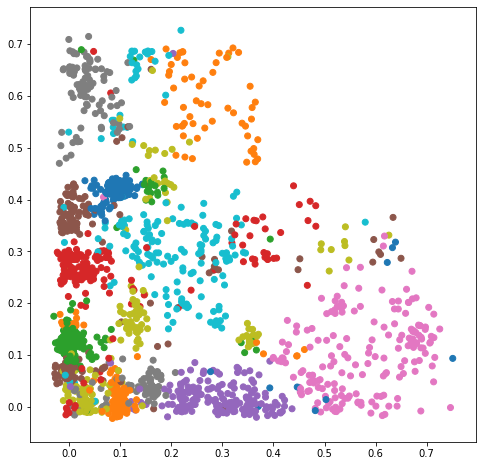

CPU times: user 1.35 s, sys: 544 ms, total: 1.89 s
Wall time: 1.71 s


In [3]:
%%time
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               learning_rate=0.3,
               y_variance=0.05, 
               bases=1000, 
               epochs=100,
               logging=emby.Logging.Progress, 
               device=emby.Device.GPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


MNIST
---

Found 1 CUDA devices
id 0    b'GeForce GTX 1080 Ti'                              [SUPPORTED]
                      compute capability: 6.1
                           pci device id: 0
                              pci bus id: 1
Summary:
	1/1 devices are supported
Device GPU
Fitted done/  500 -- movement:  0.6448277221108882  -- time:  1.7591149806976318         


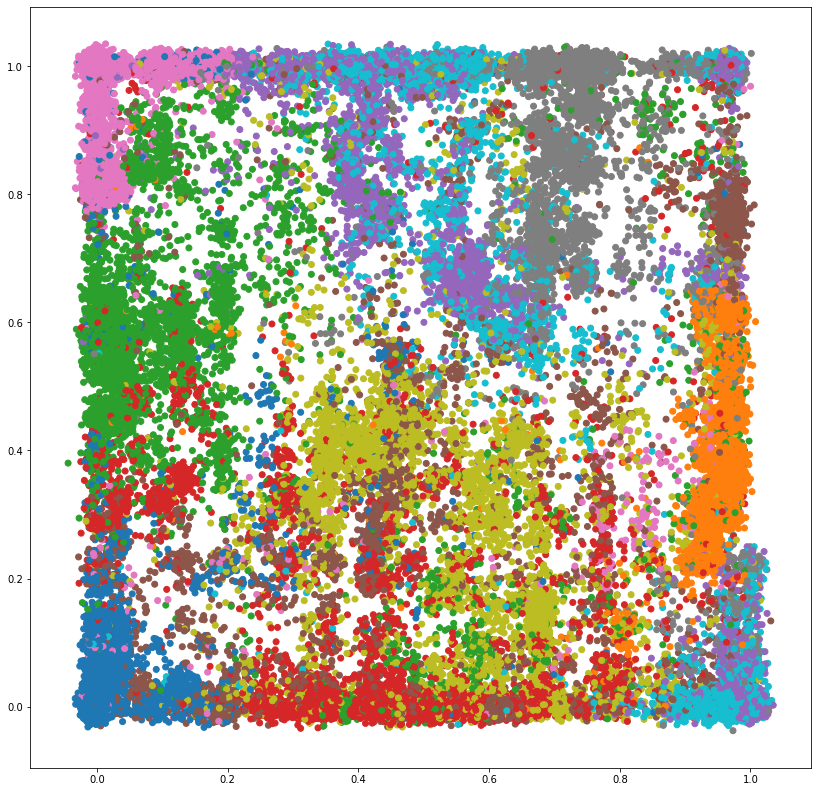

In [3]:
import tensorflow_datasets as tfds

mnist = tfds.load(name="mnist")["train"]
mnist_data = []
mnist_labels = []
for sample in tfds.as_numpy(mnist):
    image = sample["image"]
    label = sample["label"]

    mnist_data.append(image.reshape(-1) / 256)
    mnist_labels.append(label)

x, y = np.array(mnist_data), np.array(mnist_labels)

x = x - x.mean()

som = emby.SOM(Z=2, 
               bases=1000, 
               epochs=500,
               learning_rate=0.1,
               y_variance=0.15,
               logging=emby.Logging.Everything,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print("Fitted done")

plt.figure(figsize=(14, 14))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


IRIS
---

Time to fit transform 3.3535661697387695- time: 0.003                   


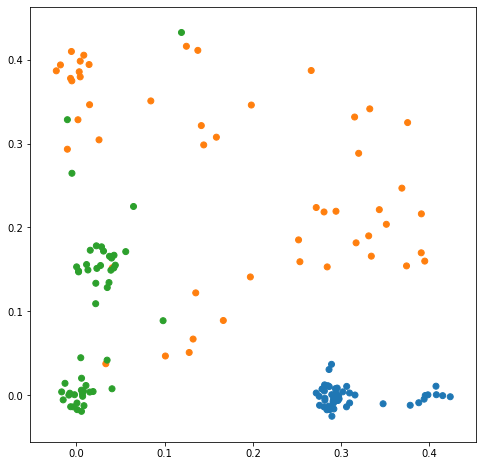

CPU times: user 2.85 s, sys: 944 ms, total: 3.8 s
Wall time: 3.51 s


In [4]:
%%time
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               learning_rate=0.2,
               y_variance=0.05, 
               epochs=1000,
               bases=1000, 
               logging=emby.Logging.Progress, 
               device=emby.Device.GPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()



Wine
---

Time to fit transform 5.146991729736328267728402544  -- time:  0.004971504211425781           


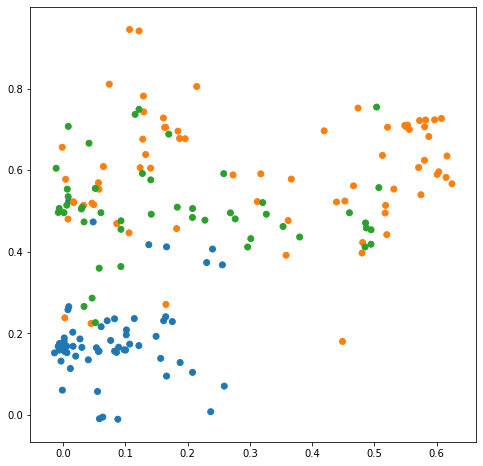

CPU times: user 4.08 s, sys: 1.55 s, total: 5.63 s
Wall time: 5.31 s


In [13]:
%%time
from sklearn.datasets import load_wine

wine = load_wine()

x = wine.data
y = wine.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               learning_rate=0.3,
               y_variance=0.05, 
               epochs=1000,
               bases=1000, 
               logging=emby.Logging.Progress, 
               device=emby.Device.GPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()

Breast Cancer
---

Time to fit transform 8.2777216434478765548413087943  -- time:  0.008076667785644531          0.008175134658813477         0.1280072414786253  -- time:  0.008219480514526367         


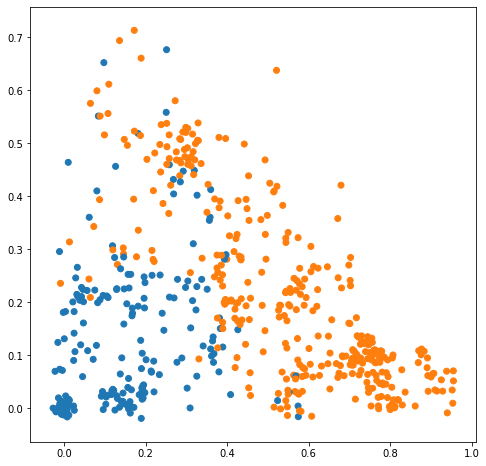

CPU times: user 6.4 s, sys: 2.4 s, total: 8.8 s
Wall time: 8.47 s


In [14]:
%%time
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

x = bc.data
y = bc.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               learning_rate=0.3,
               y_variance=0.03, 
               epochs=1000,
               bases=1000, 
               logging=emby.Logging.Progress, 
               device=emby.Device.GPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()

Cancer on a line
---

Time to fit transform 5.79306960105896  -- time: 0.003                   


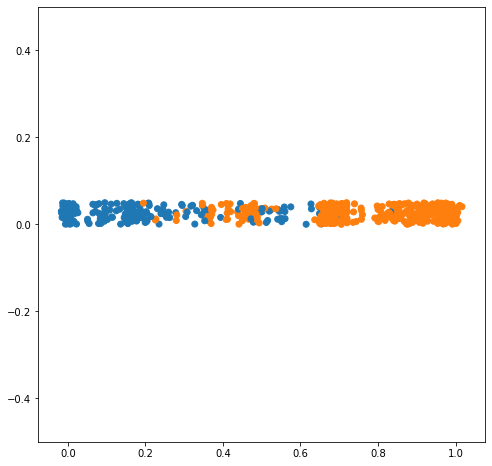

CPU times: user 4.81 s, sys: 1.56 s, total: 6.37 s
Wall time: 5.97 s


In [8]:
%%time
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

x = bc.data
y = bc.target

x = x - x.mean()

som = emby.SOM(Z=1, 
               learning_rate=0.8,
               y_variance=0.03, 
               epochs=2000,
               bases=100, 
               logging=emby.Logging.Progress, 
               device=emby.Device.GPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 1))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], np.random.rand(embeddings.size) * 0.05, color=colors[y])
plt.ylim([-0.5, 0.5])
plt.show()

CovType
---

Time to fit transform 37.15359568595886 time: 0.372                   


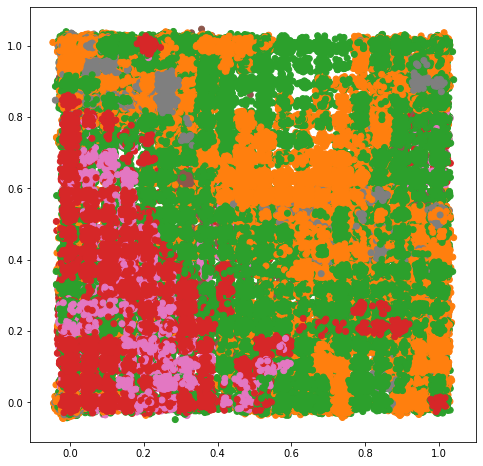

CPU times: user 49.6 s, sys: 11.9 s, total: 1min 1s
Wall time: 1min


In [9]:
%%time
from sklearn.datasets import fetch_covtype

data = fetch_covtype()

x = data.data
y = data.target

x = x - x.mean()

som = emby.SOM(Z=2, 
               learning_rate=0.6,
               y_variance=0.05, 
               epochs=100,
               bases=400, 
               logging=emby.Logging.Progress, 
               device=emby.Device.GPU,
               uniform_base_position="origo")

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = som.fit_transform(x) + np.random.normal(0, 0.01, size=(len(x), 2))
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()